In [50]:
import sqlite3, matplotlib.pyplot as plt, pandas as pd,base64, io
%matplotlib inline
connection = sqlite3.connect('database.db')

def display_image(image_data):
    decoded_image = io.BytesIO(base64.b64decode(image_data))
    img = plt.imread(decoded_image, format='png')
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## Show melanoma statistics

In [51]:
df = pd.read_sql_query("""
    SELECT nb.name, nb.accuracy, nb.loss, met.precision, met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    WHERE met.type = 'Melanoma' AND nb.configuration_id > 14
    ORDER BY met.recall DESC;
""", connection)
df

name  accuracy         loss  precision  f1_score  \
0           resnetGANV4Std  0.849111    25.989305   0.350467  0.445104   
1           resnetGANV3Seg  0.865557  1025.127563   0.284000  0.380697   
2      xceptionGANV3MinMax  0.823867    20.421400   0.311628  0.396450   
3            convNextGANV3  0.879231    15.374818   0.488189  0.496000   
4      xceptionGANV4MinMax  0.857621    22.326580   0.401408  0.430189   
5     resnetGANV3SegMinMax  0.842991    23.739708   0.314607  0.372093   
6        resnetGANV3MinMax  0.866801    23.432995   0.413534  0.429687   
7         convnextGANV4Std  0.459744     7.301409   0.393939  0.407843   
8         convnextGANV3Seg  0.867374    10.778628   0.475728  0.433628   
9            convnextGANV4  0.854179    14.179653   0.393939  0.351351   
10  convnextGANV3SegMinMax  0.157391     5.384803   0.179245  0.226866   
11        xceptionGANV3Std  0.829222    21.412296   0.307692  0.300000   
12           xceptionGANV4  0.910403   746.359680   0.375000  0.312796   
13        xceptionGANV3Seg  0.921495   818.763794   0.409091  0.285714   
14           xceptionGANV3  0.912603   772.993408   0.419355  0.281081   
15          resnetGANV3Std  0.885733    24.103804   0.500000  0.280702   
16        convnextGANV3Std  0.508223     8.712954   0.564103  0.271605   
17  xceptionGANV3SegMinMax  0.801014    18.449224   0.262500  0.206897   
18        xceptionGANV4Std  0.874737    28.681000   0.760000  0.256757   
19       resnetGANV4MinMax  0.875215    26.090889   0.483871  0.194805   
20             resnetGANV4  0.924268   774.975342   0.600000  0.130435   
21             resnetGANV3  0.913559   829.412537   0.636364  0.104478   
22     convnextGANV3MinMax  0.120195     3.781379   0.277778  0.070922   
23     convnextGANV4MinMax  0.083668     7.904159   0.357143  0.072993   

     roc_auc    recall  specificity  
0   0.823234  0.609756     0.898614  
1   0.724722  0.577236     0.869438  
2   0.810153  0.544715     0.892050  
3   0.848233  0.504065     0.952589  
4   0.786554  0.463415     0.938001  
5   0.802966  0.455285     0.911014  
6   0.783871  0.447154     0.943107  
7   0.833953  0.422764     0.941648  
8   0.860259  0.398374     0.960613  
9   0.808718  0.317073     0.956236  
10  0.702449  0.308943     0.873085  
11  0.730435  0.292683     0.940919  
12  0.619315  0.268293     0.959883  
13  0.598999  0.219512     0.971554  
14  0.608395  0.211382     0.973742  
15  0.683039  0.195122     0.982495  
16  0.841294  0.178862     0.987600  
17  0.730210  0.170732     0.956966  
18  0.654374  0.154472     0.995624  
19  0.689100  0.121951     0.988330  
20  0.534397  0.073171     0.995624  
21  0.531050  0.056911     0.997082  
22  0.668262  0.040650     0.990518  
23  0.657466  0.040650     0.993435

## Show notebooks statistics

In [52]:
df = pd.read_sql_query("""
    --SELECT nb.name, nb.accuracy, nb.loss, nb.auc, nb.recall, nb.precision
    SELECT nb.configuration_id, nb.architecture, nb.accuracy, nb.loss, nb.auc, nb.recall, nb.precision
    FROM notebook AS nb
    WHERE nb.configuration_id > 14
    ORDER BY nb.configuration_id
""", connection)
df

configuration_id architecture  accuracy         loss       auc    recall  \
0                 15     ConvNeXt  0.879231    15.374818  0.892624  0.807229   
1                 15     ResNetV2  0.913559   829.412537  0.829242  0.706158   
2                 15     Xception  0.912603   772.993408  0.826629  0.702142   
3                 16     ConvNeXt  0.120195     3.781379  0.883318  0.717537   
4                 16     ResNetV2  0.866801    23.432995  0.873880  0.775100   
5                 16     Xception  0.823867    20.421400  0.858980  0.745649   
6                 17     ConvNeXt  0.867374    10.778628  0.903145  0.821285   
7                 17     ResNetV2  0.865557  1025.127563  0.734402  0.544177   
8                 17     Xception  0.921495   818.763794  0.845348  0.734270   
9                 18     ConvNeXt  0.157391     5.384803  0.864615  0.680723   
10                18     ResNetV2  0.842991    23.739708  0.860501  0.753681   
11                18     Xception  0.801014    18.449224  0.859007  0.742303   
12                19     ConvNeXt  0.508223     8.712954  0.872902  0.757697   
13                19     ResNetV2  0.885733    24.103804  0.887430  0.801205   
14                19     Xception  0.829222    21.412296  0.860658  0.746319   
15                20     ConvNeXt  0.854179    14.179653  0.886232  0.792503   
16                20     ResNetV2  0.924268   774.975342  0.848141  0.739625   
17                20     Xception  0.910403   746.359680  0.824732  0.699464   
18                21     ConvNeXt  0.083668     7.904159  0.840180  0.720884   
19                21     ResNetV2  0.875215    26.090889  0.878208  0.787818   
20                21     Xception  0.857621    22.326580  0.872686  0.770415   
21                22     ConvNeXt  0.459744     7.301409  0.871064  0.738956   
22                22     ResNetV2  0.849111    25.989305  0.857318  0.745649   
23                22     Xception  0.874737    28.681000  0.866295  0.766399   

    precision  
0    0.807229  
1    0.706158  
2    0.702142  
3    0.721400  
4    0.775100  
5    0.745649  
6    0.821285  
7    0.544177  
8    0.734270  
9    0.682093  
10   0.754186  
11   0.742303  
12   0.758205  
13   0.801205  
14   0.746319  
15   0.792503  
16   0.739625  
17   0.699464  
18   0.720884  
19   0.787818  
20   0.770415  
21   0.739451  
22   0.745649  
23   0.766399

## Get confusion matrixes

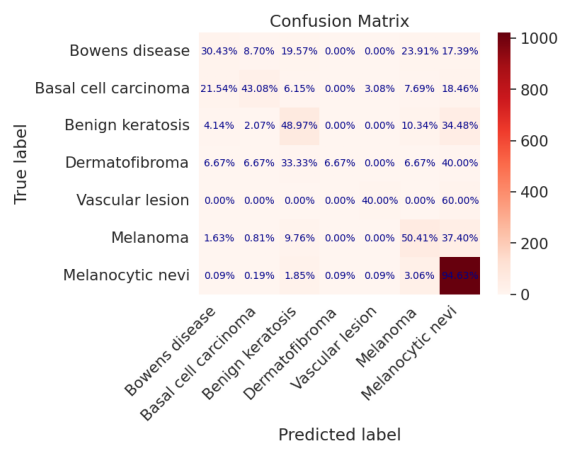

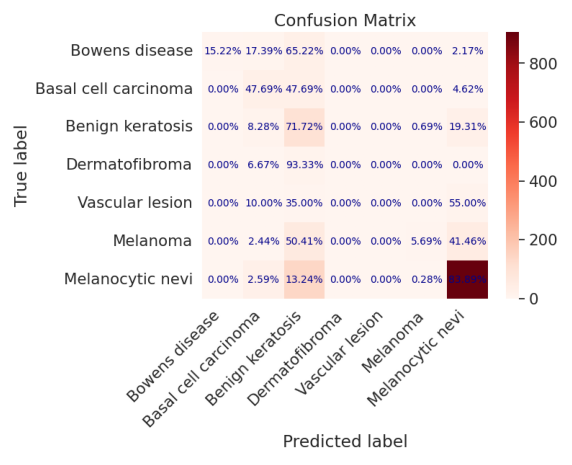

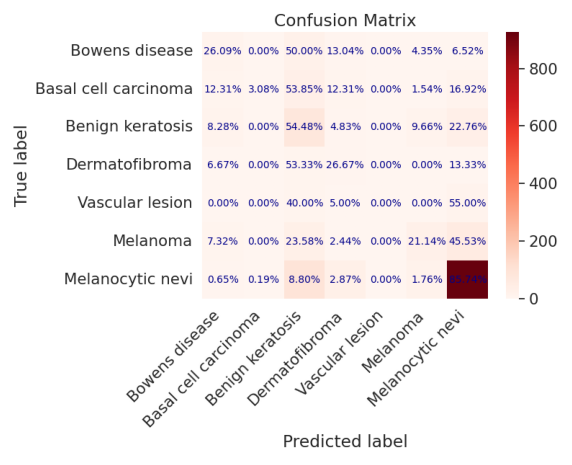

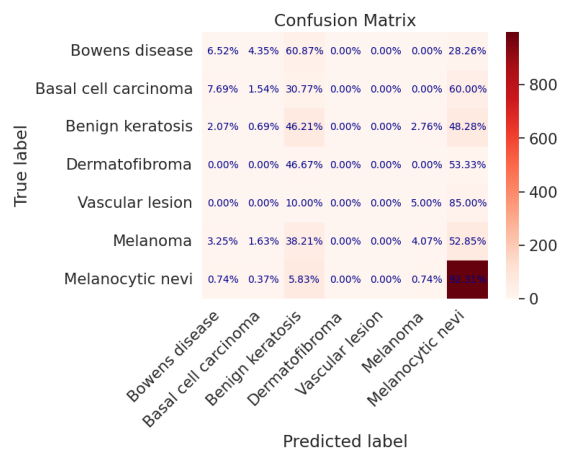

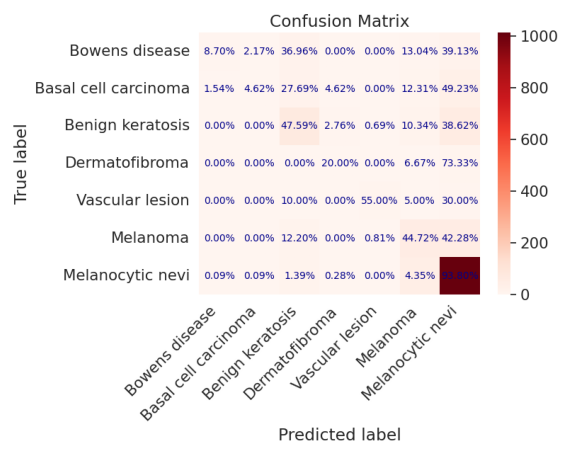

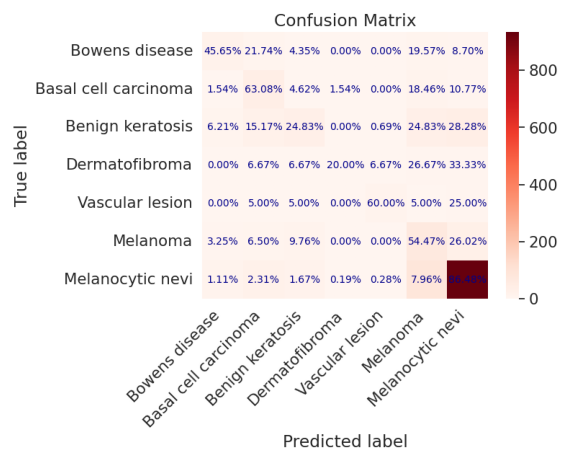

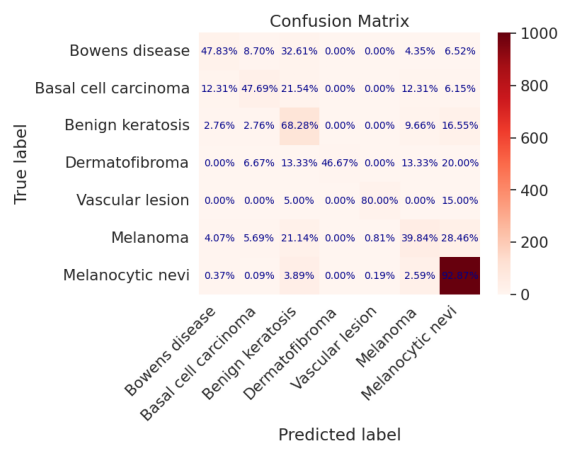

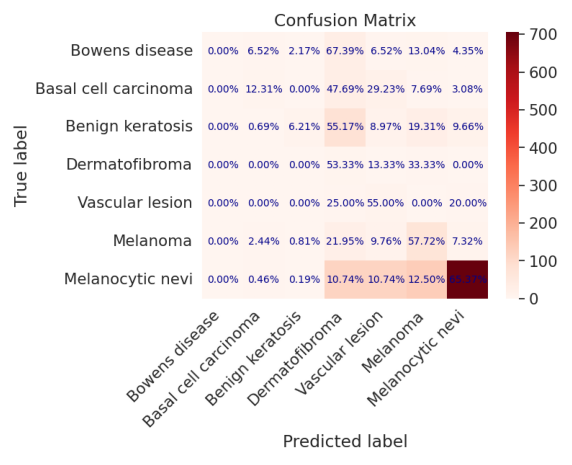

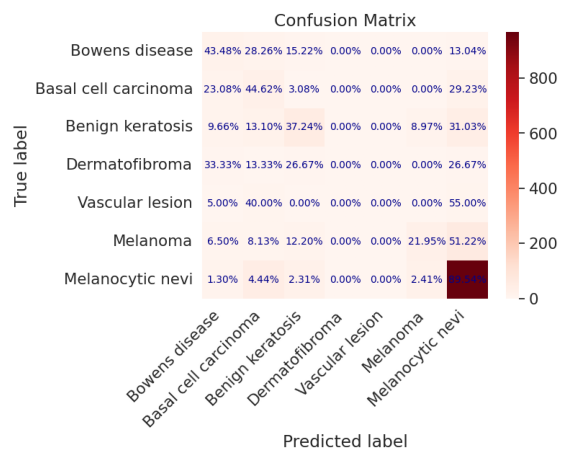

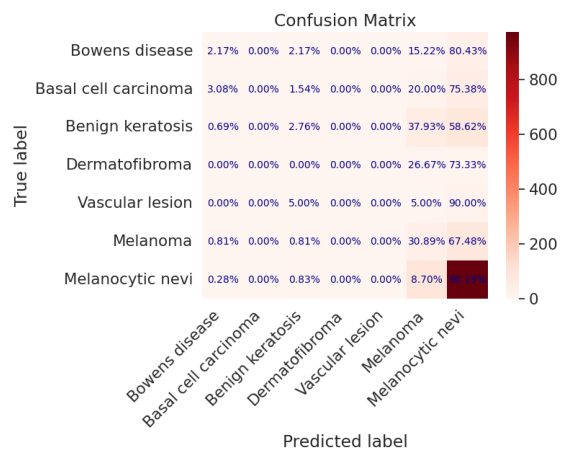

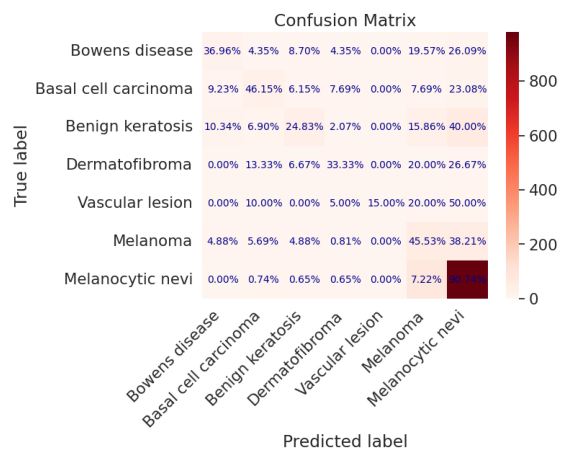

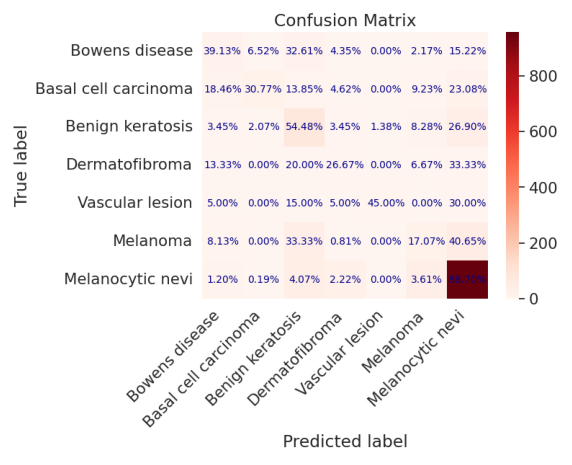

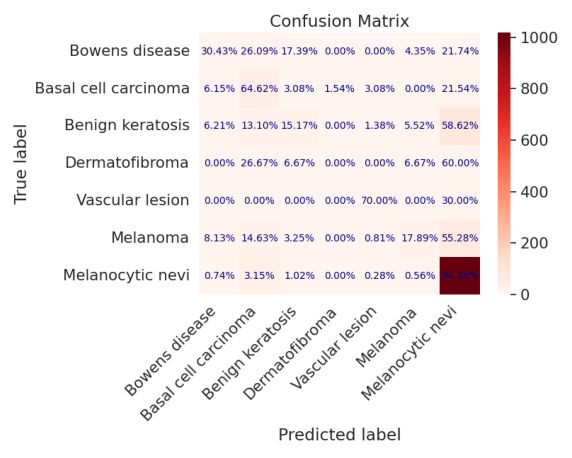

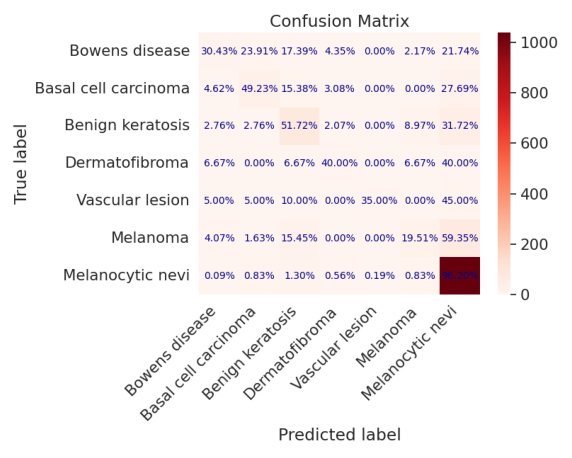

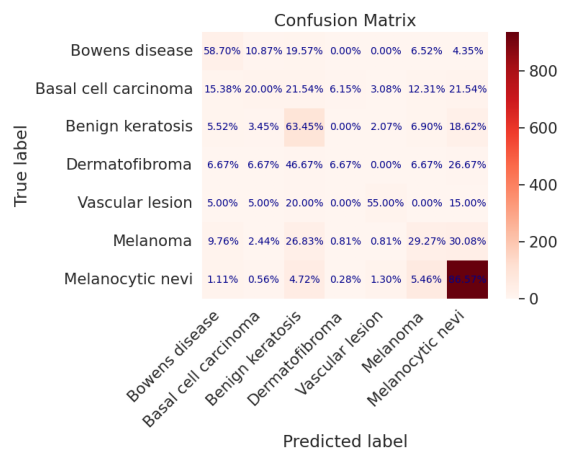

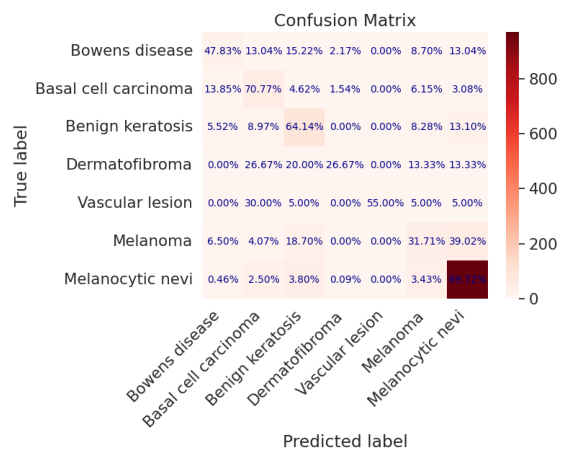

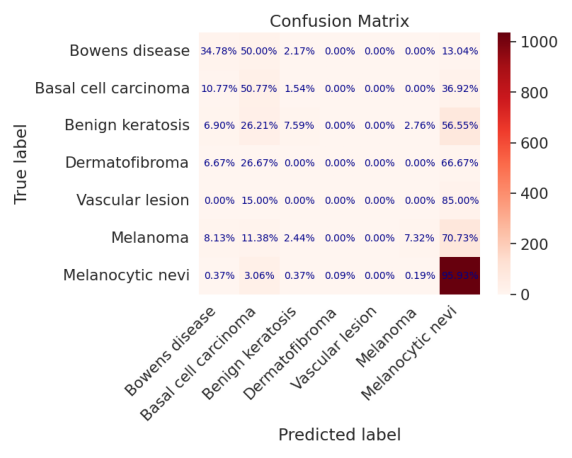

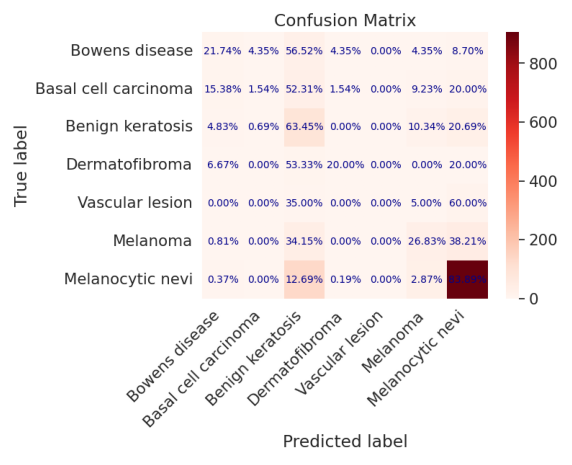

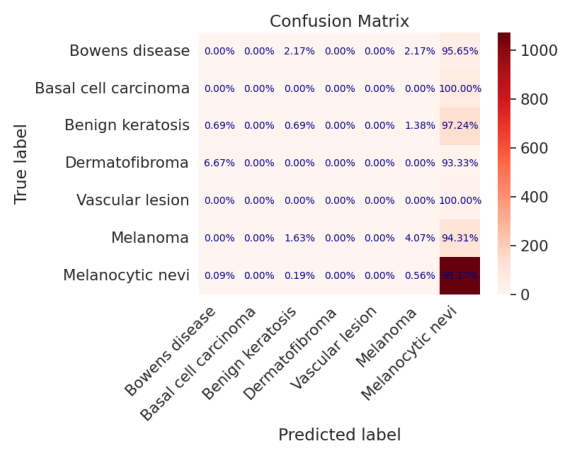

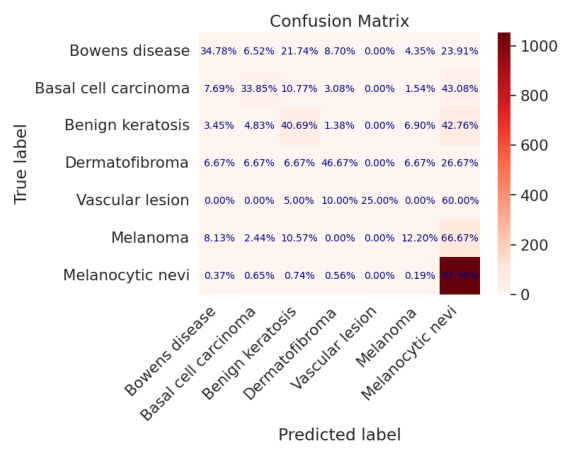

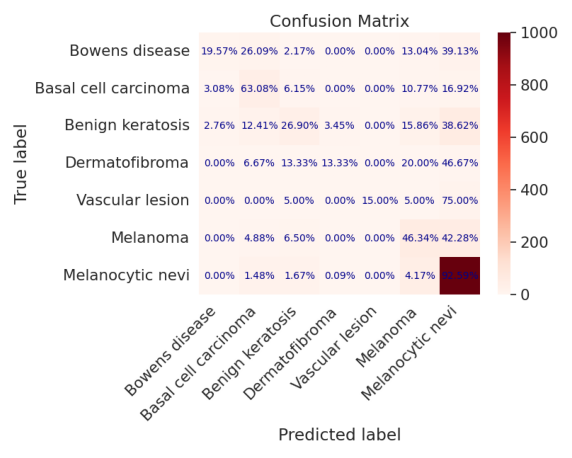

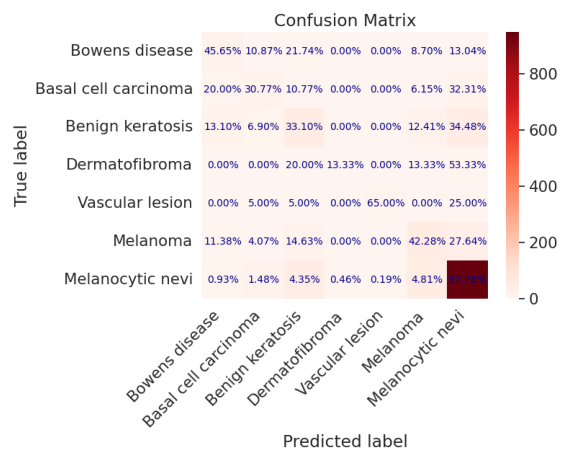

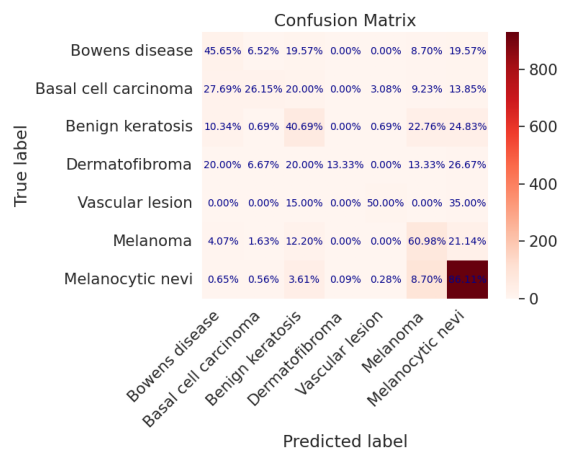

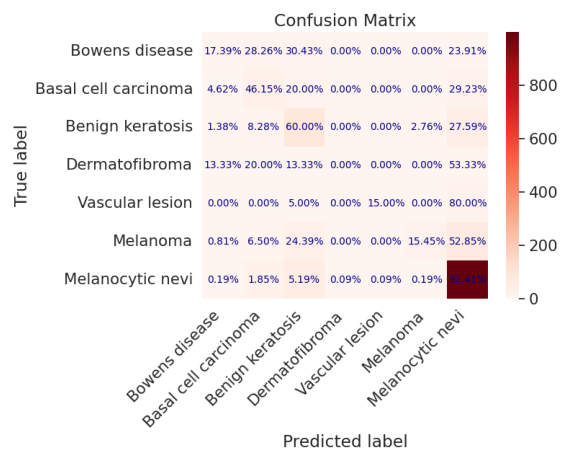

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
Name: confusion_matrix, dtype: object

In [53]:
df = pd.read_sql_query("""
    SELECT nb.confusion_matrix
    FROM notebook AS nb
    WHERE nb.configuration_id > 14
""", connection)
df['confusion_matrix'].apply(display_image)

## Display accuracy graphs during training

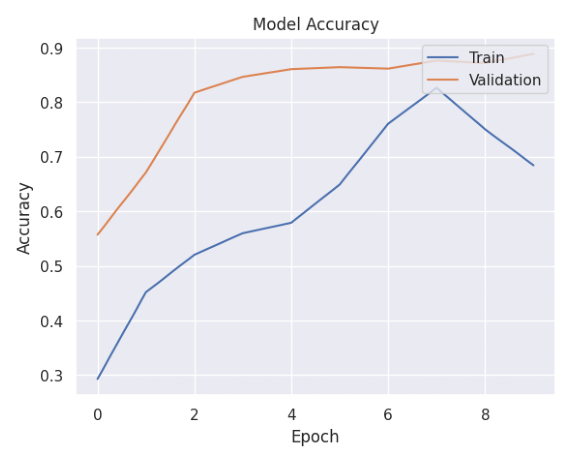

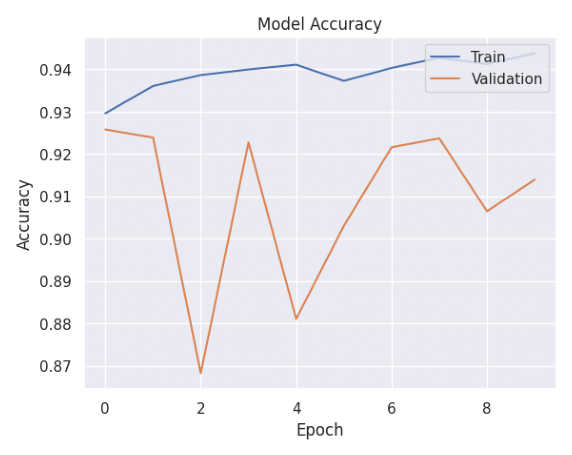

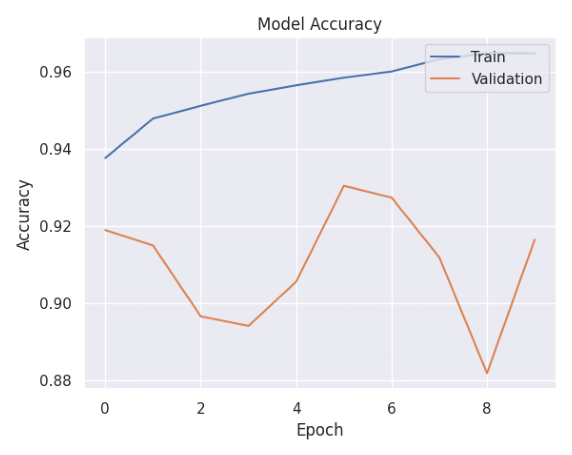

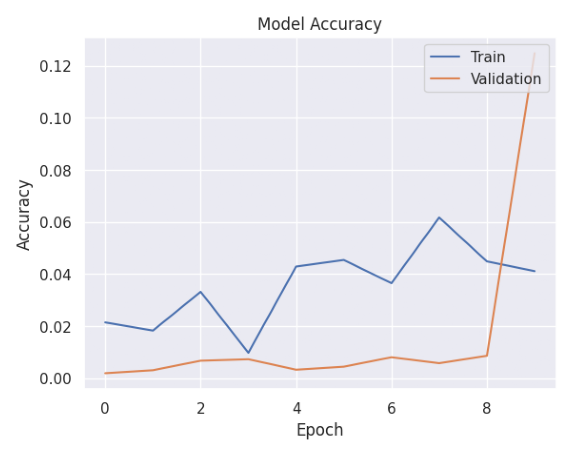

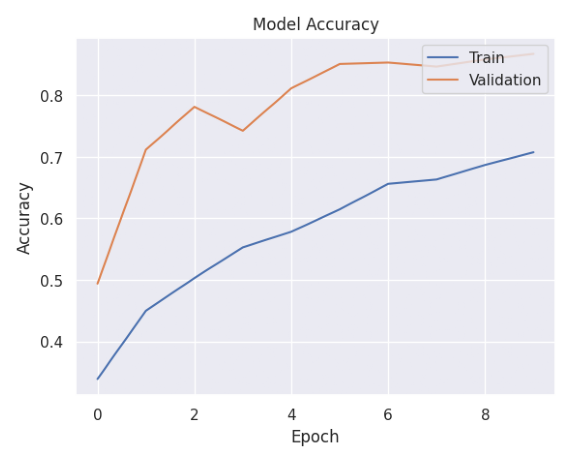

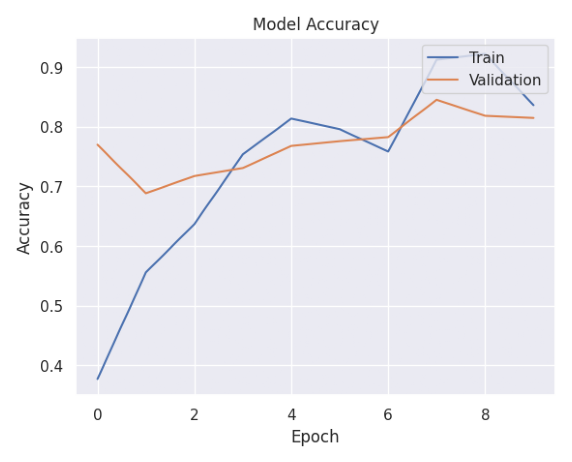

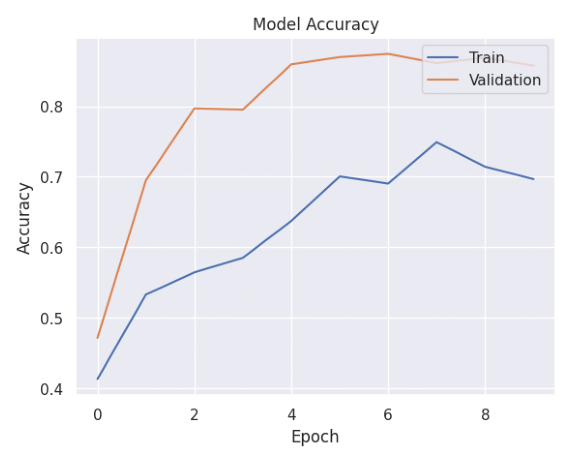

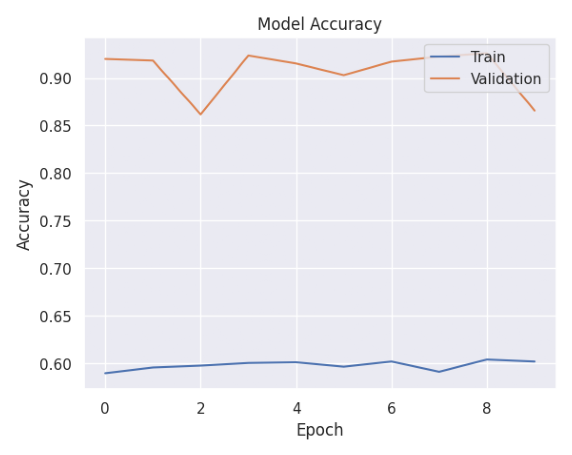

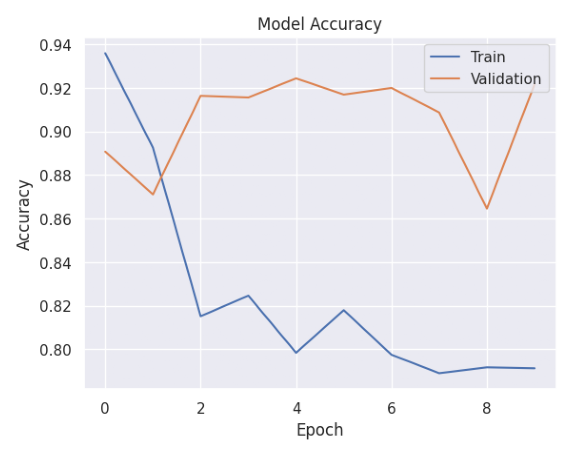

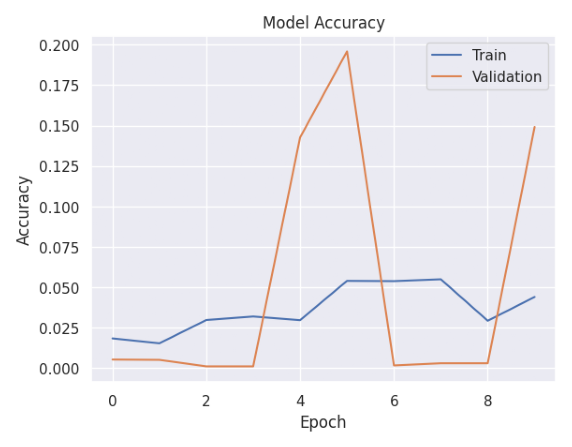

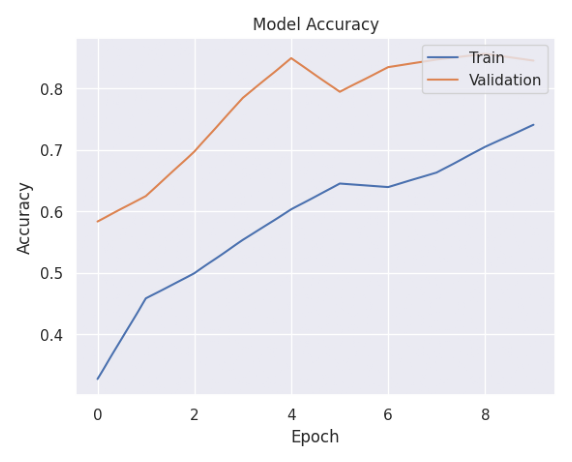

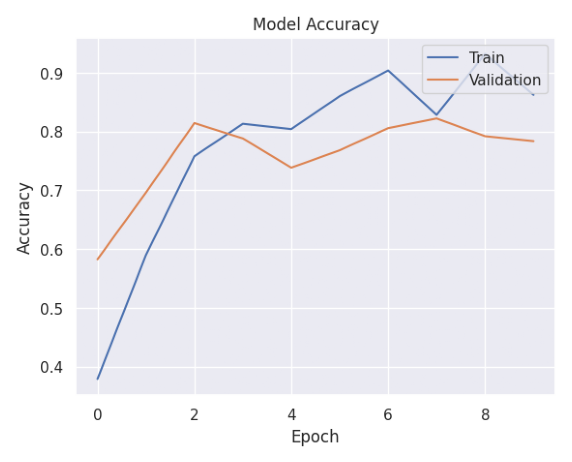

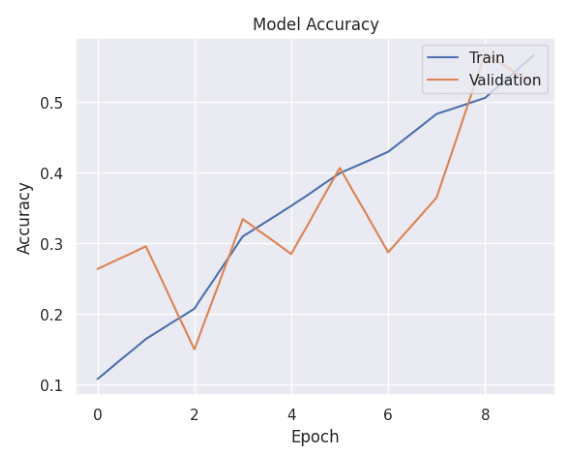

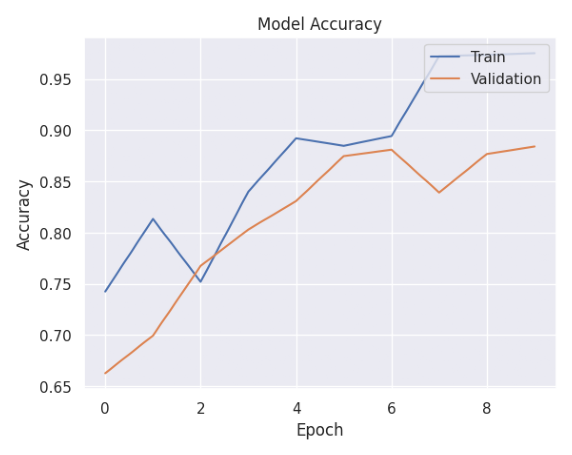

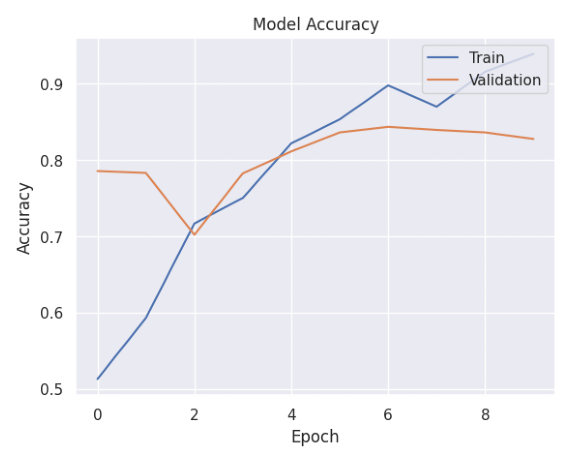

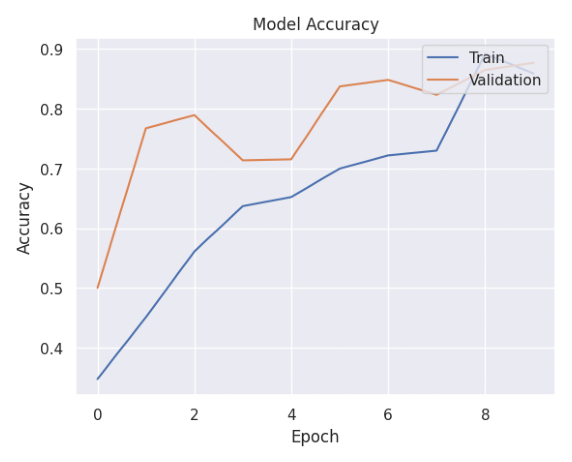

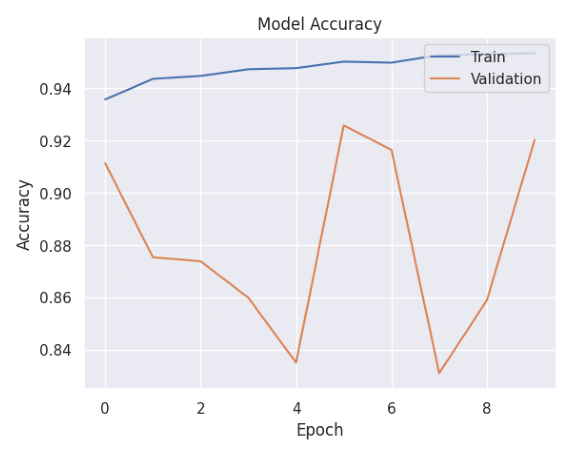

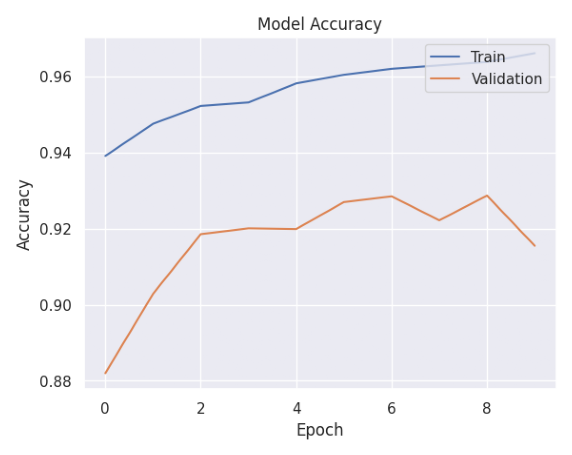

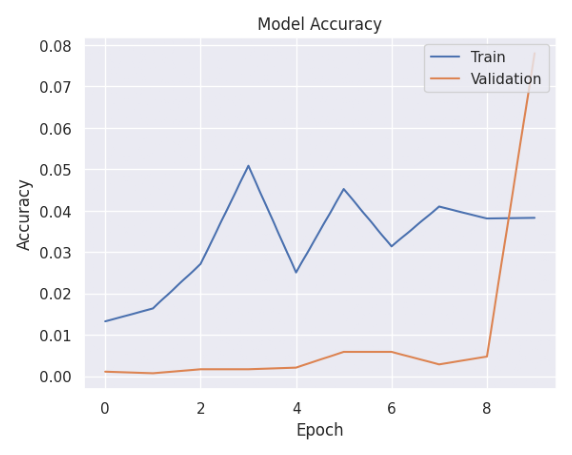

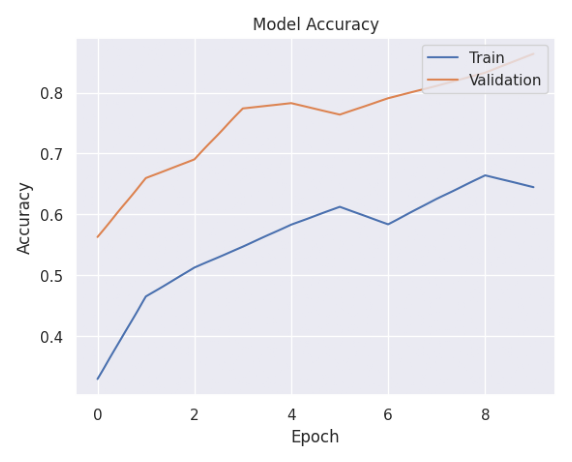

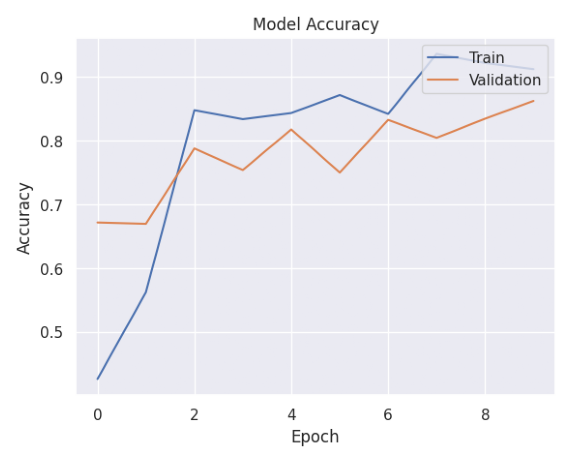

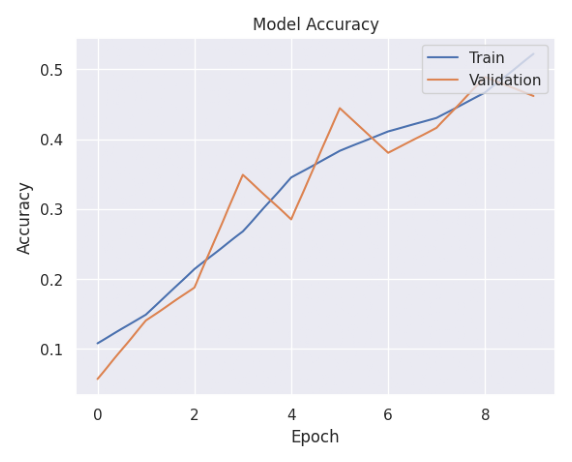

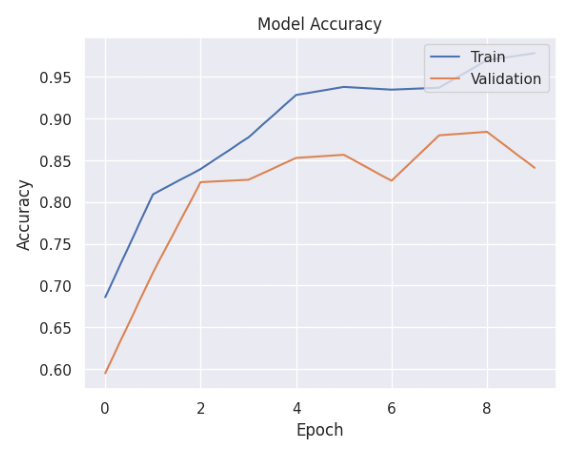

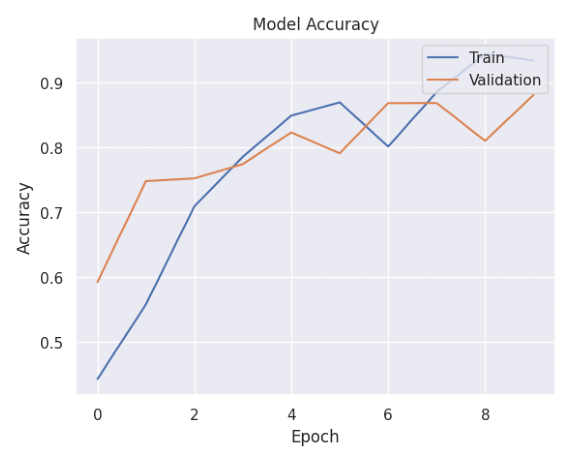

accuracy_epochs
0   iVBORw0KGgoAAAANSUhEUgAAAkEAAAHPCAYAAABUVg6YAA...
1   iVBORw0KGgoAAAANSUhEUgAAAkoAAAHPCAYAAACstvVvAA...
2   iVBORw0KGgoAAAANSUhEUgAAAkoAAAHPCAYAAACstvVvAA...
3   iVBORw0KGgoAAAANSUhEUgAAAkoAAAHPCAYAAACstvVvAA...
4   iVBORw0KGgoAAAANSUhEUgAAAkEAAAHPCAYAAABUVg6YAA...
5   iVBORw0KGgoAAAANSUhEUgAAAkEAAAHPCAYAAABUVg6YAA...
6   iVBORw0KGgoAAAANSUhEUgAAAkEAAAHPCAYAAABUVg6YAA...
7   iVBORw0KGgoAAAANSUhEUgAAAkoAAAHPCAYAAACstvVvAA...
8   iVBORw0KGgoAAAANSUhEUgAAAkoAAAHPCAYAAACstvVvAA...
9   iVBORw0KGgoAAAANSUhEUgAAAlQAAAHPCAYAAACV0UQ0AA...
10  iVBORw0KGgoAAAANSUhEUgAAAkEAAAHPCAYAAABUVg6YAA...
11  iVBORw0KGgoAAAANSUhEUgAAAkEAAAHPCAYAAABUVg6YAA...
12  iVBORw0KGgoAAAANSUhEUgAAAkEAAAHPCAYAAABUVg6YAA...
13  iVBORw0KGgoAAAANSUhEUgAAAkoAAAHPCAYAAACstvVvAA...
14  iVBORw0KGgoAAAANSUhEUgAAAkEAAAHPCAYAAABUVg6YAA...
15  iVBORw0KGgoAAAANSUhEUgAAAkEAAAHPCAYAAABUVg6YAA...
16  iVBORw0KGgoAAAANSUhEUgAAAkoAAAHPCAYAAACstvVvAA...
17  iVBORw0KGgoAAAANSUhEUgAAAkoAAAHPCAYAAACstvVvAA...
18  iVBORw0KGgoAAAANSUhEUgAAAkoAAAHPCAYAAACstvVvAA...
19  iVBORw0KGgoAAAANSUhEUgAAAkEAAAHPCAYAAABUVg6YAA...
20  iVBORw0KGgoAAAANSUhEUgAAAkEAAAHPCAYAAABUVg6YAA...
21  iVBORw0KGgoAAAANSUhEUgAAAkEAAAHPCAYAAABUVg6YAA...
22  iVBORw0KGgoAAAANSUhEUgAAAkoAAAHPCAYAAACstvVvAA...
23  iVBORw0KGgoAAAANSUhEUgAAAkEAAAHPCAYAAABUVg6YAA...

In [54]:
df = pd.read_sql_query("""
    SELECT nb.accuracy_epochs
    FROM notebook AS nb
    WHERE nb.configuration_id > 14
""", connection)
df['accuracy_epochs'].apply(display_image)
df

## Display losses graphs during training

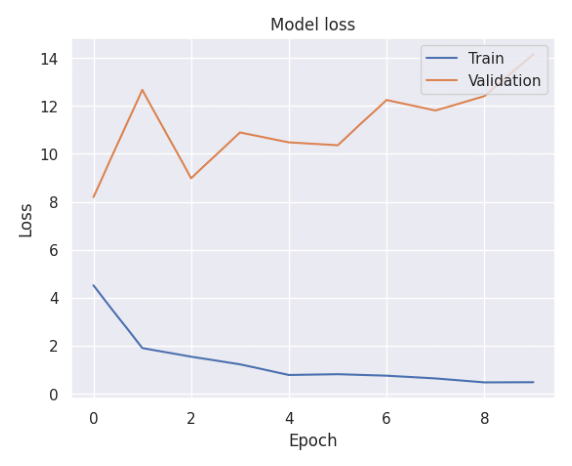

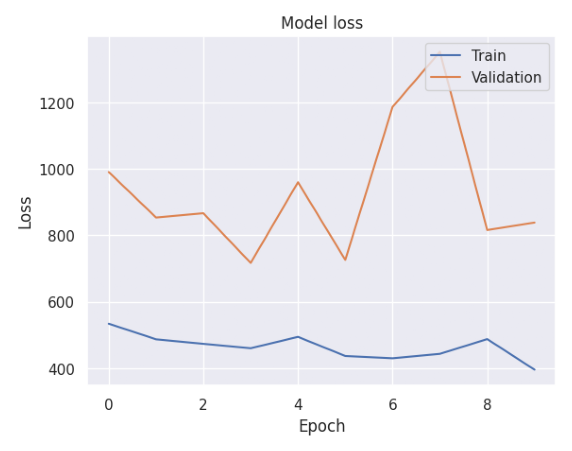

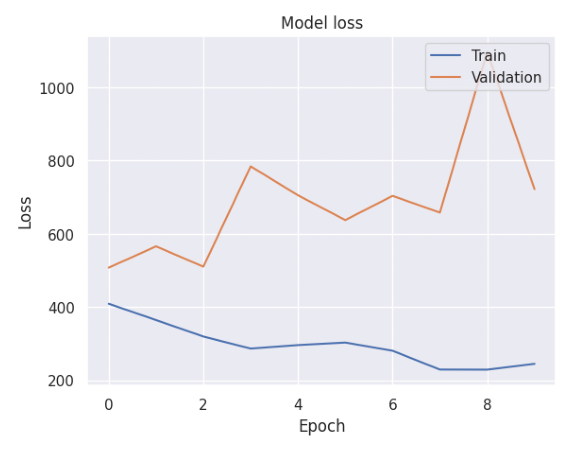

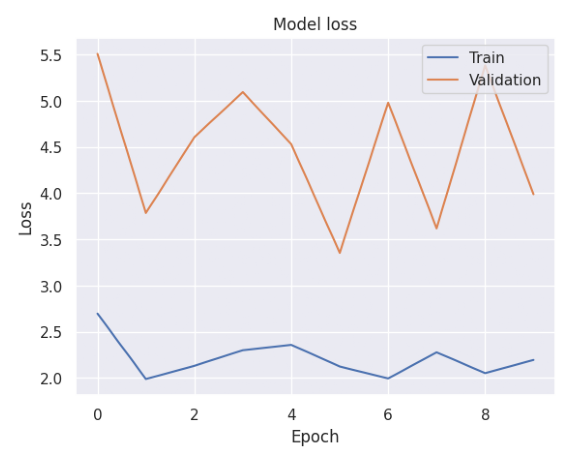

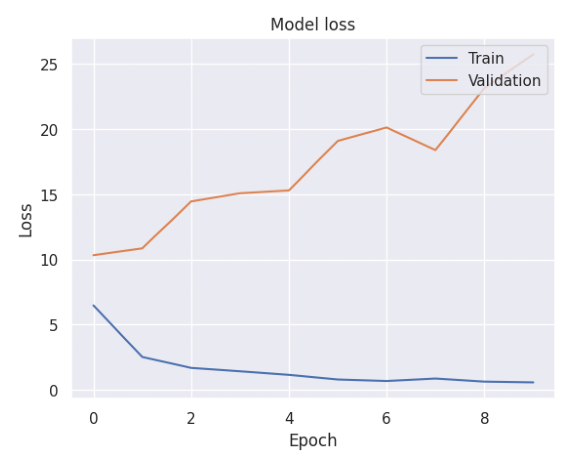

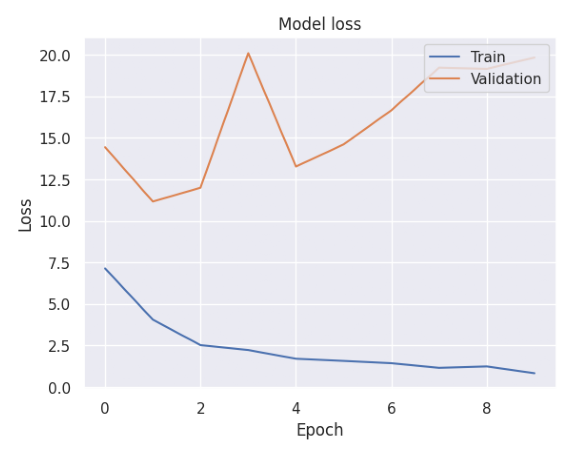

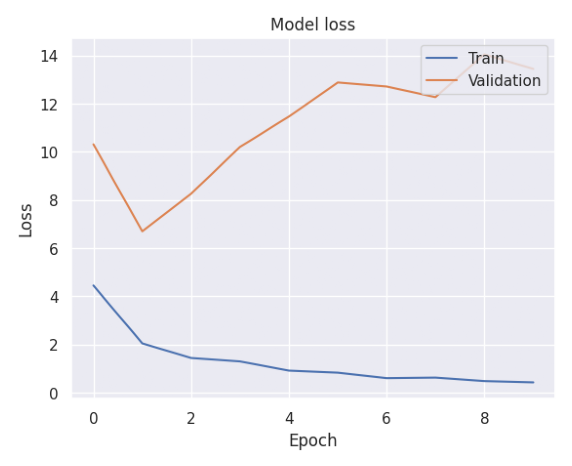

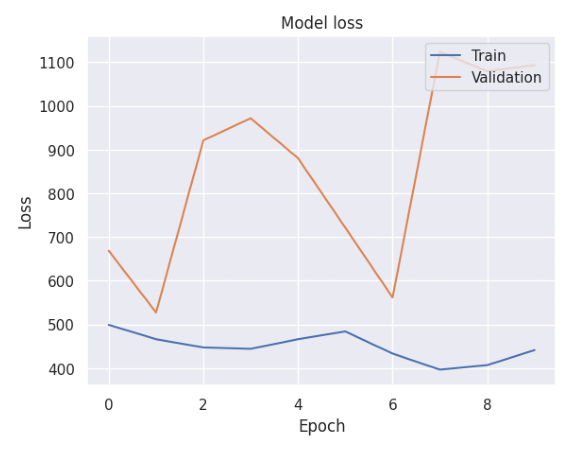

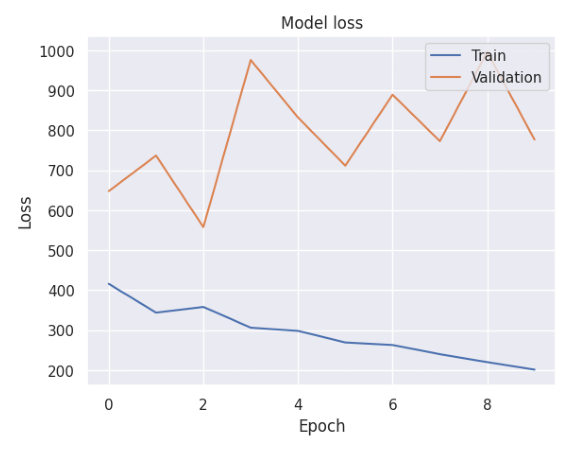

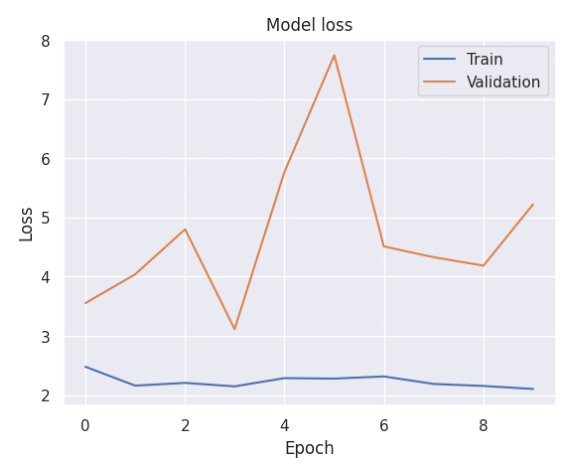

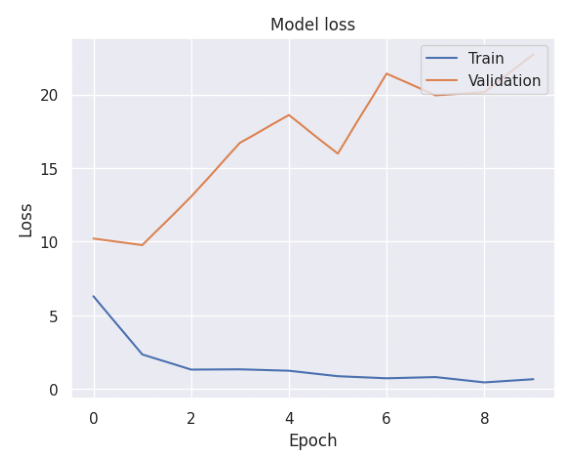

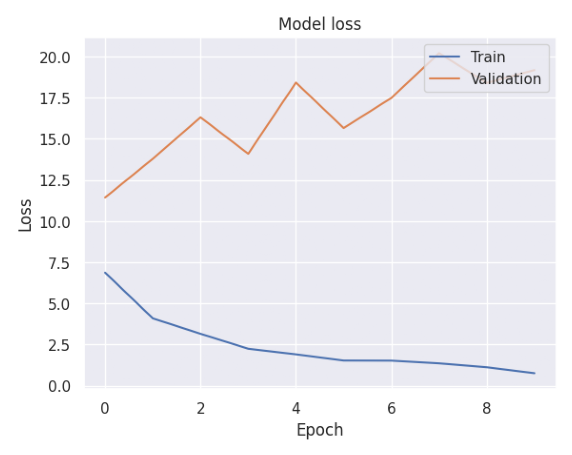

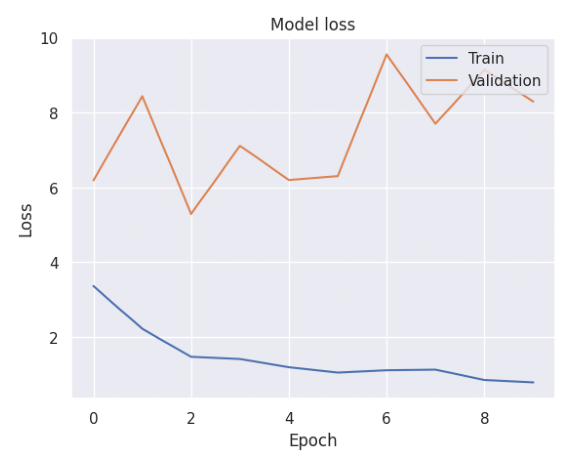

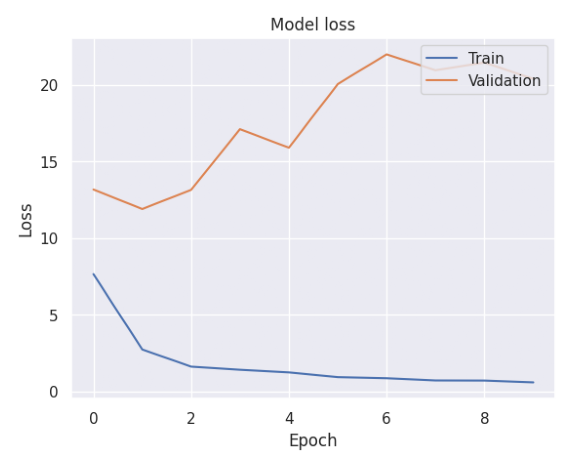

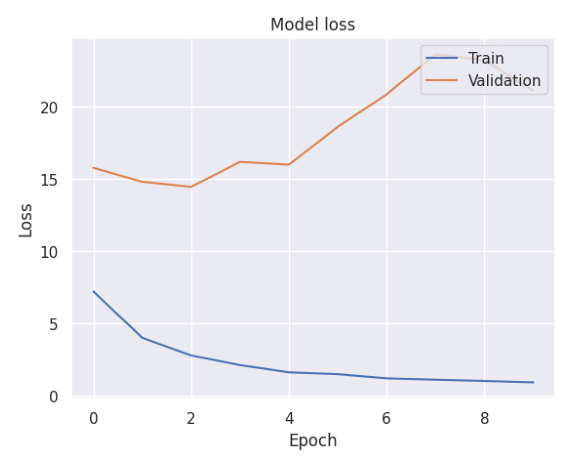

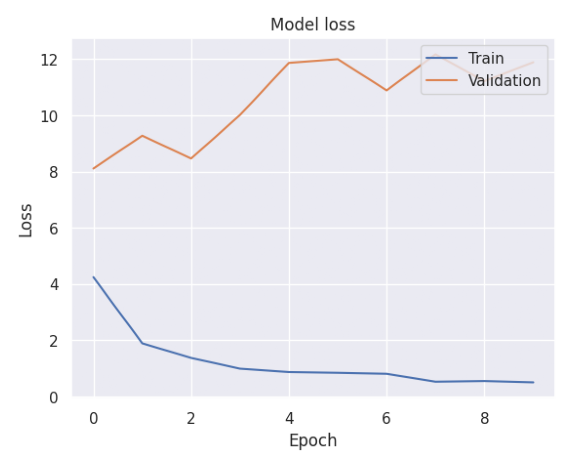

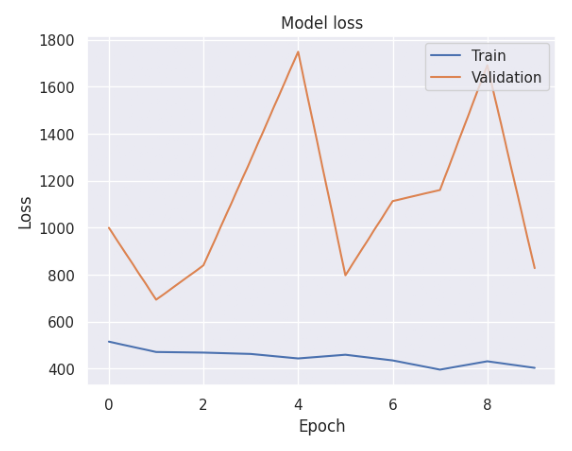

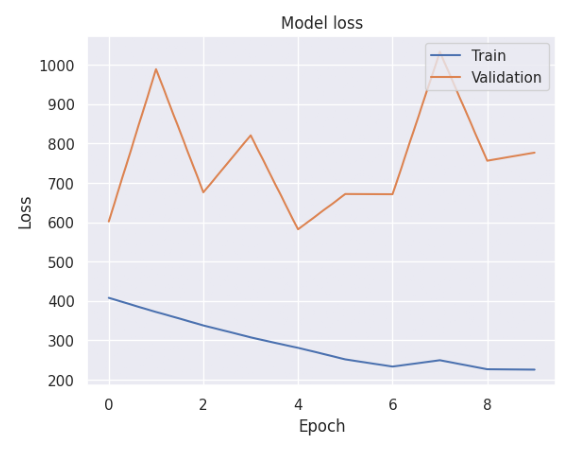

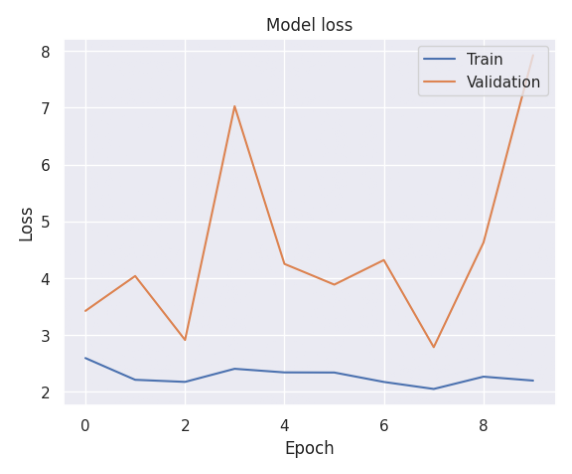

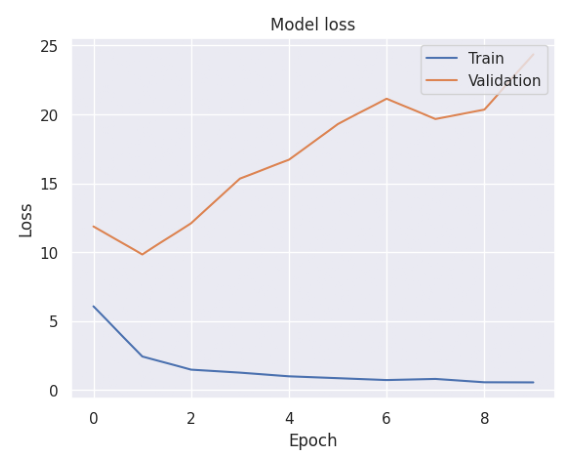

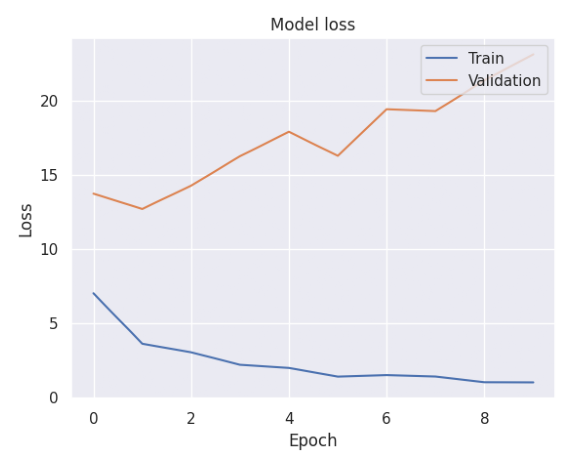

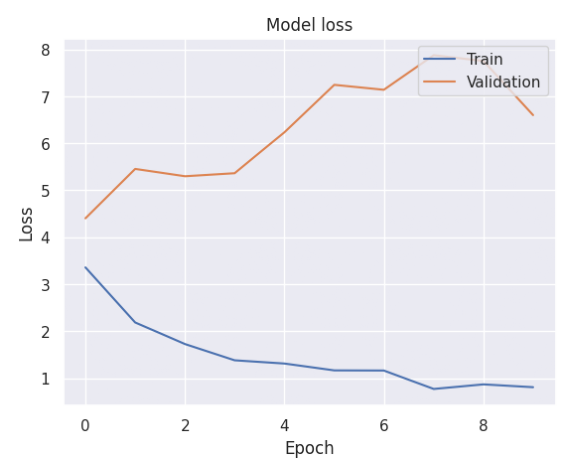

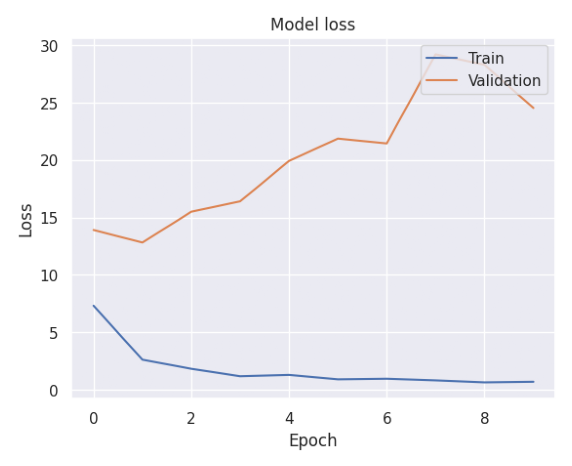

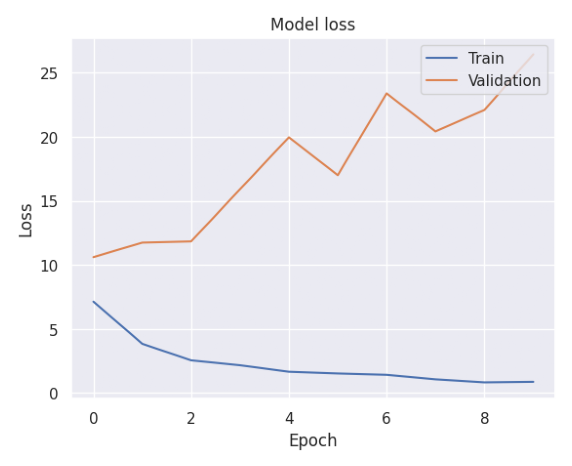

loss_epochs
0   iVBORw0KGgoAAAANSUhEUgAAAjwAAAHPCAYAAABX4QCwAA...
1   iVBORw0KGgoAAAANSUhEUgAAAk8AAAHPCAYAAABKnz4rAA...
2   iVBORw0KGgoAAAANSUhEUgAAAk8AAAHPCAYAAABKnz4rAA...
3   iVBORw0KGgoAAAANSUhEUgAAAkEAAAHPCAYAAABUVg6YAA...
4   iVBORw0KGgoAAAANSUhEUgAAAjwAAAHPCAYAAABX4QCwAA...
5   iVBORw0KGgoAAAANSUhEUgAAAkoAAAHPCAYAAACstvVvAA...
6   iVBORw0KGgoAAAANSUhEUgAAAjwAAAHPCAYAAABX4QCwAA...
7   iVBORw0KGgoAAAANSUhEUgAAAk8AAAHPCAYAAABKnz4rAA...
8   iVBORw0KGgoAAAANSUhEUgAAAk8AAAHPCAYAAABKnz4rAA...
9   iVBORw0KGgoAAAANSUhEUgAAAjIAAAHPCAYAAABJKDADAA...
10  iVBORw0KGgoAAAANSUhEUgAAAjwAAAHPCAYAAABX4QCwAA...
11  iVBORw0KGgoAAAANSUhEUgAAAkoAAAHPCAYAAACstvVvAA...
12  iVBORw0KGgoAAAANSUhEUgAAAjwAAAHPCAYAAABX4QCwAA...
13  iVBORw0KGgoAAAANSUhEUgAAAjwAAAHPCAYAAABX4QCwAA...
14  iVBORw0KGgoAAAANSUhEUgAAAjwAAAHPCAYAAABX4QCwAA...
15  iVBORw0KGgoAAAANSUhEUgAAAjwAAAHPCAYAAABX4QCwAA...
16  iVBORw0KGgoAAAANSUhEUgAAAk8AAAHPCAYAAABKnz4rAA...
17  iVBORw0KGgoAAAANSUhEUgAAAk8AAAHPCAYAAABKnz4rAA...
18  iVBORw0KGgoAAAANSUhEUgAAAjIAAAHPCAYAAABJKDADAA...
19  iVBORw0KGgoAAAANSUhEUgAAAjwAAAHPCAYAAABX4QCwAA...
20  iVBORw0KGgoAAAANSUhEUgAAAjwAAAHPCAYAAABX4QCwAA...
21  iVBORw0KGgoAAAANSUhEUgAAAjIAAAHPCAYAAABJKDADAA...
22  iVBORw0KGgoAAAANSUhEUgAAAjwAAAHPCAYAAABX4QCwAA...
23  iVBORw0KGgoAAAANSUhEUgAAAjwAAAHPCAYAAABX4QCwAA...

In [55]:
df = pd.read_sql_query("""
    SELECT nb.loss_epochs
    FROM notebook AS nb
    WHERE nb.configuration_id > 14
""", connection)
df['loss_epochs'].apply(display_image)
df

In [56]:
df = pd.read_sql_query("""
    SELECT nb.architecture || ' (' || nb.configuration_id ||')' as name, count(*) as total
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    WHERE met.precision > .5 and met.f1_score > .5 and met.roc_auc > .5 and met.specificity > .5 and met.recall > .5 and nb.accuracy > .5 and nb.configuration_id > 14
    group by nb.name
    ORDER BY count(*) DESC;
""", connection)
df

name  total
0   ConvNeXt (20)      3
1   Xception (16)      2
2   ResNetV2 (19)      2
3   ResNetV2 (16)      2
4   ConvNeXt (19)      2
5   ConvNeXt (17)      2
6   Xception (22)      1
7   Xception (21)      1
8   Xception (20)      1
9   Xception (19)      1
10  Xception (18)      1
11  Xception (17)      1
12  Xception (15)      1
13  ResNetV2 (22)      1
14  ResNetV2 (21)      1
15  ResNetV2 (18)      1
16  ResNetV2 (17)      1
17  ResNetV2 (15)      1
18  ConvNeXt (15)      1

## Close db connection

In [57]:
connection.close()